In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib import style
%matplotlib inline
import seaborn as sns
from scipy.stats import stats


In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.shape

(21613, 21)

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df=df.drop(["id"],axis=1)

In [9]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)
df["day"] = df["date"].apply(lambda date: date.day)
df.drop("date",axis = 1,inplace=True)
inputs = list(df.columns.values)
inputs.remove("price")
output = "price"

In [10]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'price').index
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

# OR

In [11]:
def pearsonrCorrelation(df,numInputCols,numOutput,numFeatures):
    cofList = []
    for inputCol in numInputCols:
        pearsonr_cof, p_value = stats.pearsonr(numOutput,df[inputCol])
        cofList.append((inputCol,pearsonr_cof))
        cofList.sort(key=lambda col:col[1],reverse=True)
    return cofList[:numFeatures]
pearsonrCorrelation(df,inputs,df[output],10)

[('sqft_living', 0.702035054611799),
 ('grade', 0.6674342560202497),
 ('sqft_above', 0.6055672983560784),
 ('sqft_living15', 0.5853789035795691),
 ('bathrooms', 0.5251375054139638),
 ('view', 0.3972934882944908),
 ('sqft_basement', 0.3238160207119929),
 ('bedrooms', 0.3083495981456337),
 ('lat', 0.3070034799952186),
 ('waterfront', 0.2663694340306044)]

In [12]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
X = df.loc[:,df.columns!=output]
Y = df.loc[:,output].values.reshape(-1,1)
fit = test.fit(X, Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))

C:\Users\uchiha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


     Feature_Name     Score
2     sqft_living  7.347198
8           grade  6.926336
16  sqft_living15  5.176749
9      sqft_above  5.025809
1       bathrooms  3.558845
14            lat  3.191478
5      waterfront  2.694191
6            view  2.439409
10  sqft_basement  1.901768
0        bedrooms  1.679357


In [13]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
df_scores = pd.DataFrame(model.feature_importances_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))

C:\Users\uchiha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


     Feature_Name     Score
14            lat  0.077086
20            day  0.073183
16  sqft_living15  0.072749
15           long  0.072315
3        sqft_lot  0.072007
2     sqft_living  0.071529
9      sqft_above  0.070635
17     sqft_lot15  0.070424
11       yr_built  0.068850
19          month  0.064767


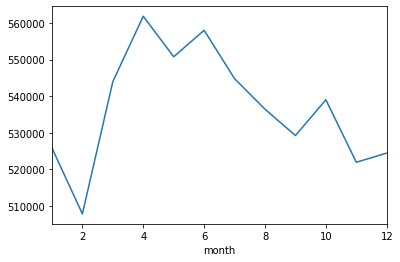

In [14]:
df.groupby('month').mean()["price"].plot();


In [15]:
# for column in df.columns:
#     df[column] = df[column]  / df[column].abs().max()
dfN = df.copy()
for column in df.columns:
    dfN[column] = (dfN[column] - dfN[column].min()) / (dfN[column].max() - dfN[column].min()) 

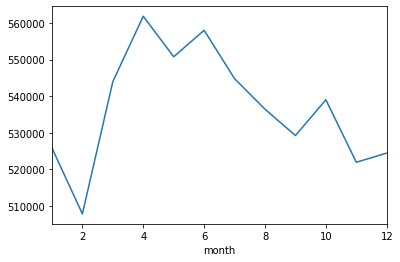

In [16]:
df.groupby('month').mean()["price"].plot();


In [18]:
X = np.array(df['sqft_living']).reshape(-1, 1)
y = np.array(df['price'])

## Mono-linear regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn import metrics


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=405)

model=LinearRegression()   #build linear regression model
model.fit(X_train,y_train)  #fitting the training data
pred=model.predict(X_test) #testing our model’s performance

In [20]:
print("MSE : ", mean_squared_error(y_test,pred))
print("R squared : ", metrics.r2_score(y_test,pred))

MSE :  67193635914.06649
R squared :  0.48986903605820364


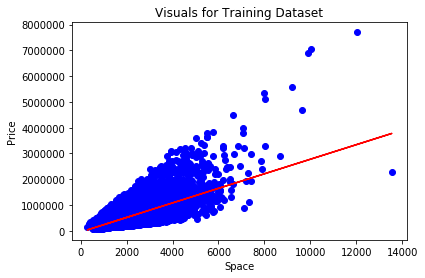

In [23]:
#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'blue')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

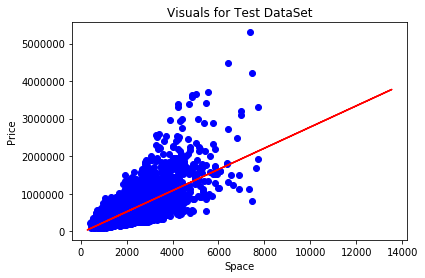

In [24]:
#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'blue')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [25]:
df["price"].describe().T

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## Multi-linear regression


In [26]:
X= df.iloc[:,1:].values
y = df.iloc[:,0].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=405)

model=LinearRegression()   
model.fit(X_train,y_train)  
pred=model.predict(X_test)

In [27]:
print("MSE : ", mean_squared_error(y_test,pred))
print("R squared : ", metrics.r2_score(y_test,pred))

MSE :  39151931658.26795
R squared :  0.7027603527429531


## Polynomial Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics


x= df.iloc[:,1:].values
y= df.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=405)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

In [33]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  25871747919.096756
R squared:  0.8035828910686303
